# Explanation Generation Test

In [1]:
import os
import tqdm
from hydra.experimental import initialize, compose

with initialize(config_path="../experiment/config/"):
    cfg = compose("load_early.yaml")
print(cfg)

{'experiment_name': 'cartpole_ppo_train', 'env': 'cartpole', 'agents': {'seed': 1938, 'algorithm': 'ppo', 'policy': 'MlpPolicy', 'num_agents': 10, 'load_agent': True, 'save_agent': False, 'do_train': False, 'task_name': 'ppo_train', 'timesteps': 70000, 'save_freq': 10000, 'save_dir': '/home/joon/xai/causal/stable-baselines3/outputs/zero-train-ver-1213/cartpole_agents/', 'env_params': {'start_state_mode': 'gym_wrappers.StartStateMode.DESIGNATED_POSITIONS', 'start_states': [0.0]}}, 'collector_module': {'_target_': 'experiment.handlers.CustomRangeDataCollector', 'num_dims': 4, 'custom_ranges': [[[-2.4, 2.4, 41]], [[-4.8, -1.2, 7], [-1.2, 1.2, 29], [1.2, 4.8, 7]], [[-0.209, -0.05, 7], [-0.05, 0.05, 29], [0.05, 0.209, 7]], [[-0.418, 0.418, 41]]], 'num_divisions': 41, 'num_agents': 10, 'num_freq_saves': 7, 'collect_seed': 5868, 'total_trials': 50, 'env_params': {'start_state_mode': 'gym_wrappers.StartStateMode.DESIGNATED_POSITIONS', 'start_states': [0.0]}}, 'test_module': 'None'}


In [ ]:
os.chdir('/home/joon/xai/causal/stable-baselines3')

from experiment.handlers import ExperimentHandler
a = ExperimentHandler(cfg)
ranges, data = a.run()


/home/joon/miniconda3/envs/icp/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/joon/miniconda3/envs/icp/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/joon/miniconda3/envs/icp/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/joon/miniconda3/envs/icp/lib/py

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


  0%|          | 0/50 [00:00<?, ?it/s]

agent # 0


  0%|          | 0/50 [00:00<?, ?it/s]

agent # 1


  0%|          | 0/50 [00:00<?, ?it/s]

agent # 2


  2%|▏         | 1/50 [00:00<00:08,  5.68it/s]

agent # 3


  0%|          | 0/50 [00:00<?, ?it/s]

agent # 4


  0%|          | 0/50 [00:00<?, ?it/s]

agent # 5


  0%|          | 0/50 [00:00<?, ?it/s]

agent # 6


 74%|███████▍  | 37/50 [00:12<00:04,  2.87it/s]

(41,)

[10, 9, 10, 11]
[0.0, -0.5052631578947366, -1.3877787807814457e-17, 0.043999999999999984]


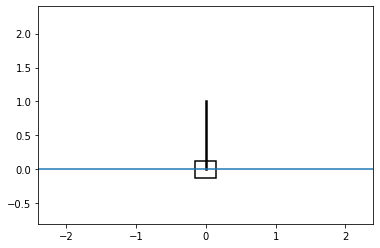

[0.17044621 0.10235423 0.92701863 0.1527293 ]


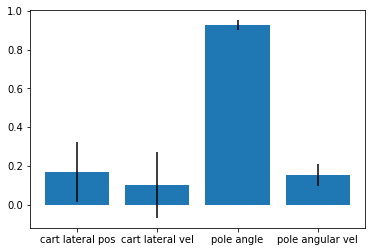

[0.17003785 0.01018175 0.92800494 0.07816918]


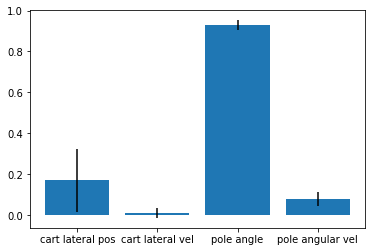

[0.17024252 0.05630222 0.92751171 0.11545717]


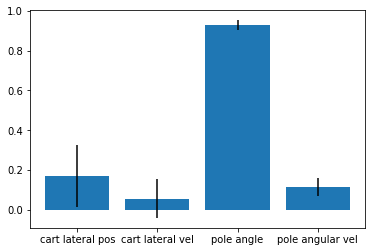

10
difference 0.0038714190378940846


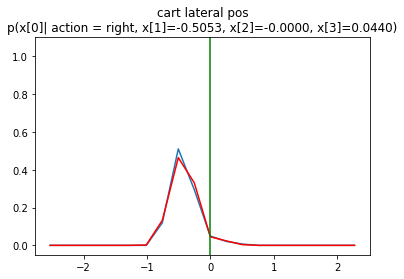

point biserial coefficient = -0.015632970188281848
9
difference 0.0013931811694033822


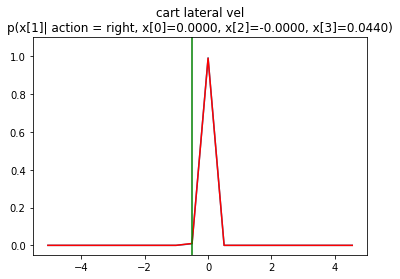

point biserial coefficient = 0.0010777847189483798
10
difference 0.5214785214785215


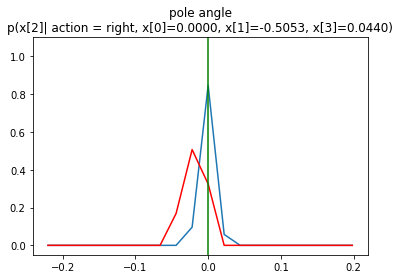

point biserial coefficient = 0.6093542172549179
11
difference 0.3149972632731253


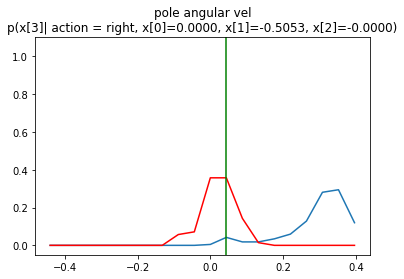

point biserial coefficient = 0.6693842789501773


In [71]:
import numpy as np
avg = []
stderr = []

ranges = []
#ranges += [np.linspace(-2.4, 2.4, 20)]
#ranges += [np.linspace(-4.8, 4.8, 20)]
#ranges += [np.linspace(-0.209, 0.209, 20)]
#ranges += [np.linspace(-0.418, 0.418, 20)]

dp = [10, 10, 10, 10]
pd = np.sum(np.sum(data, axis=0), axis=0).flatten()
pd = pd / np.sum(pd)
pick = int(np.nonzero(np.random.multinomial(1, pd))[0])

dp = []

for i in range(4):
    dp = [pick % 20] + dp
    pick = pick // 20
dp = [10, 9, 10, 11]
    
print(dp)
real_dp = []
probs = []
errs = []
to_probs = []
to_errs = []

for i in range(4):
    real_dp += [(ranges[i][dp[i]-1] + ranges[i][dp[i]])/2]

print(real_dp)

for action in range(2):
    probs += [np.average(np.sum(data[:, action, dp[0], :, :, :], axis=(1,2,3)) / np.sum(data[:, action, :, :, :, :], axis=(1,2,3,4)))]
    errs += [np.std(np.sum(data[:, action, dp[0], :, :, :], axis=(1,2,3)) / np.sum(data[:, action, :, :, :, :], axis=(1,2,3,4)))]
    probs += [np.average(np.sum(data[:, action, :, dp[1], :, :], axis=(1,2,3)) / np.sum(data[:, action, :, :, :, :], axis=(1,2,3,4)))]
    errs += [np.std(np.sum(data[:, action, :, dp[1], :, :], axis=(1,2,3)) / np.sum(data[:, action, :, :, :, :], axis=(1,2,3,4)))]
    probs += [np.average(np.sum(data[:, action, :, :, dp[2], :], axis=(1,2,3)) / np.sum(data[:, action, :, :, :, :], axis=(1,2,3,4)))]
    errs += [np.std(np.sum(data[:, action, :, :, dp[2], :], axis=(1,2,3)) / np.sum(data[:, action, :, :, :, :], axis=(1,2,3,4)))]
    probs += [np.average(np.sum(data[:, action, :, :, :, dp[3]], axis=(1,2,3)) / np.sum(data[:, action, :, :, :, :], axis=(1,2,3,4)))]
    errs += [np.std(np.sum(data[:, action, :, :, :, dp[3]], axis=(1,2,3)) / np.sum(data[:, action, :, :, :, :], axis=(1,2,3,4)))]
    
    avg += [np.average(data[:, action, :, dp[1], dp[2], dp[3]], axis=0)]
    stderr += [np.std(data[:, 0, :, dp[1], dp[2], dp[3]], axis=0)]
    avg += [np.average(data[:, action, dp[0], :, dp[2], dp[3]], axis=0)]
    stderr += [np.std(data[:, 0, dp[0], :, dp[2], dp[3]], axis=0)]
    avg += [np.average(data[:, action, dp[0], dp[1], :, dp[3]], axis=0)]
    stderr += [np.std(data[:, 0, dp[0], dp[1], :, dp[3]], axis=0)]
    avg += [np.average(data[:, action, dp[0], dp[1], dp[2], :], axis=0)]
    stderr += [np.std(data[:, 0, dp[0], dp[1], dp[2], :], axis=0)]
to_probs += [np.average(np.sum(data[:, :, dp[0], :, :, :], axis=(1,2,3,4)) / np.sum(data[:, :, :, :, :, :], axis=(1,2,3,4,5)))]
to_errs += [np.std(np.sum(data[:, :, dp[0], :, :, :], axis=(1,2,3,4)) / np.sum(data[:, :, :, :, :, :], axis=(1,2,3,4,5)))]
to_probs += [np.average(np.sum(data[:, :, :, dp[1], :, :], axis=(1,2,3,4)) / np.sum(data[:, :, :, :, :, :], axis=(1,2,3,4,5)))]
to_errs += [np.std(np.sum(data[:, :, :, dp[1], :, :], axis=(1,2,3,4)) / np.sum(data[:, :, :, :, :, :], axis=(1,2,3,4,5)))]
to_probs += [np.average(np.sum(data[:, :, :, :, dp[2], :], axis=(1,2,3,4)) / np.sum(data[:, :, :, :, :, :], axis=(1,2,3,4,5)))]
to_errs += [np.std(np.sum(data[:, :, :, :, dp[2], :], axis=(1,2,3,4)) / np.sum(data[:, :, :, :, :, :], axis=(1,2,3,4,5)))]
to_probs += [np.average(np.sum(data[:, :, :, :, :, dp[3]], axis=(1,2,3,4)) / np.sum(data[:, :, :, :, :, :], axis=(1,2,3,4,5)))]
to_errs += [np.std(np.sum(data[:, :, :, :, :, dp[3]], axis=(1,2,3,4)) / np.sum(data[:, :, :, :, :, :], axis=(1,2,3,4,5)))]

probs = np.array(probs)
errs = np.array(errs)

to_probs = np.array(to_probs)
to_errs = np.array(to_errs)


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

rad_90 = 3.14159265/2
fig,ax = plt.subplots(1)
rect = patches.Rectangle((real_dp[0]-0.15,-0.12),0.3,0.24,linewidth=1.5,edgecolor='black',facecolor='white')
ax.add_patch(rect)
ax.plot([real_dp[0], real_dp[0] + np.cos(real_dp[2] + rad_90)], [0, np.sin(real_dp[2] + rad_90)], color='black', linewidth=2.5)
ax.axhline(y=0)
ax.set_ylim([-0.8, 2.4])
ax.set_xlim([-2.4, 2.4])
plt.savefig("cart.png")
plt.show()

names = ['cart lateral pos', 'cart lateral vel', 'pole angle', 'pole angular vel']

print(probs[0:4])
plt.bar(names, probs[0:4], yerr=errs[0:4])
plt.savefig("prob_a0_res.png")
plt.show()

print(probs[4:8])
plt.bar(names, probs[4:8], yerr=errs[4:8])
plt.savefig("prob_a1_res.png")
plt.show()

print(to_probs)
plt.bar(names, to_probs, yerr=to_errs)
plt.savefig("prob_to_res.png")
plt.show()

saves = []
for i in range(4):
    output_str = ""
    for j in range(4):
        if i != j:
            output_str += " x[{}]={:.4f},".format(j, real_dp[j])            
    output_str = output_str[:-1]
    plt.title(names[i] + "\n" + "p(x[{}]| action = right,{})".format(i, output_str))
    diff = (ranges[i][1] - ranges[i][0]) / 2
    
    yesyes = False
    if np.sum(avg[i]) == 0:
        plt.plot(ranges[i] - diff, avg[i])
    else:
        yesyes = True
        plt.plot(ranges[i] - diff, avg[i] / np.sum(avg[i]))
        #plt.fill_between(ranges[i] - diff, avg[i]/ np.sum(avg[i])-stderr[i]/ np.sum(avg[i]), avg[i]/ np.sum(avg[i])+stderr[i]/ np.sum(avg[i]), fc='b')
    if np.sum(avg[i+4]) == 0:
        plt.plot(ranges[i] - diff, avg[i+4])
        yesyes = False
    else:
        plt.plot(ranges[i] - diff, avg[i+4]/np.sum(avg[i+4]), c='r')
        yesyes = True
        #plt.fill_between(ranges[i] - diff, avg[i+4]/np.sum(avg[i+4])-stderr[i+4]/np.sum(avg[i+4]), avg[i+4]/np.sum(avg[i+4])+stderr[i+4]/np.sum(avg[i+4]), fc='r')
    
    #Testing with Point Biserial Correlation
    if yesyes:
        ss0 = []
        ss1 = []
        for idx, val in enumerate(avg[i]):
            if idx is not 0:
                ss0 += [(ranges[i][idx-1] + ranges[i][idx])/2] * int(val)            
                ss1 += [(ranges[i][idx-1] + ranges[i][idx])/2] * int(avg[i+4][idx])
        m0 = np.average(ss0)
        m1 = np.average(ss1)
        sy = np.std(ss0+ss1)
        n0 = np.sum(avg[i])
        n1 = np.sum(avg[i+4])
        nn = n0 + n1
        r_pb = (m0-m1)/sy * np.sqrt(n0/nn * n1/nn)
    
    
    print(dp[i])
    print("difference", abs(avg[i][dp[i]]/np.sum(avg[i]) - avg[i+4][dp[i]]/np.sum(avg[i+4])))
    plt.axvline(x=[ranges[i][dp[i]]-diff], c='g')
    plt.ylim([-0.05, 1.1])
    plt.savefig("result_{}.png".format(i))
    plt.show()
    if yesyes:        
        print("point biserial coefficient = {}".format(r_pb))
        if r_pb > 0.5:
            saves += [(i, r_pb)]


In [72]:

print("")
print("According to the causal analysis between state variables and the agent's action, ")
for t in saves:
    i, rp = t[0], t[1]
    print("{} (coeff={})".format(names[t[0]], rp))
print("are the main causes of the current chosen action to take place.")
print("")

actions = ["left" ,"right"]
for t in saves:
    i, rp = t[0], t[1]
    left = avg[i][dp[i]]/np.sum(avg[i]) # 0 
    right = avg[i+4][dp[i]]/np.sum(avg[i+4]) # 1
    choice = 1 if left >= right else 0
        
    #print("left = {}, right = {}".format(left, right))
    print("The agent has taken the {} action".format(actions[choice]))
    #print("difference", abs(left-right))
    
    # left search
    j = dp[i] - 1
    while j > 0:
        _left = avg[i][j]/np.sum(avg[i]) # 0 
        _right = avg[i+4][j]/np.sum(avg[i+4]) # 1
        _choice = 1 if _left >= _right else 0
        if (choice is not _choice) and (abs(_left-_right)>0.00001):
            print("If {} were less than {:.5f} then the agent would have taken the {} action".format(names[i], (ranges[i][j-1] + ranges[i][j])/2, actions[_choice]))
            break
        j -= 1
    # right search
    j = dp[i] + 1
    print("The current {} is at {:.5f}".format(names[i], (ranges[i][dp[i]-1] + ranges[i][dp[i]])/2))
    while j <= 19:
        _left = avg[i][j]/np.sum(avg[i]) # 0 
        _right = avg[i+4][j]/np.sum(avg[i+4]) # 1
        _choice = 1 if _left >= _right else 0
        if (choice is not _choice) and (abs(_left-_right)>0.00001):            
            print("If {} were greater than {:.5f} then the agent would have taken the {} action".format(names[i], (ranges[i][j-1] + ranges[i][j])/2, actions[_choice]))
            break
        j += 1



According to the causal analysis between state variables and the agent's action, 
pole angle (coeff=0.6093542172549179)
pole angular vel (coeff=0.6693842789501773)
are the main causes of the current chosen action to take place.

The agent has taken the right action
If pole angle were less than -0.02200 then the agent would have taken the left action
The current pole angle is at -0.00000
The agent has taken the left action
The current pole angular vel is at 0.04400
If pole angular vel were greater than 0.13200 then the agent would have taken the right action


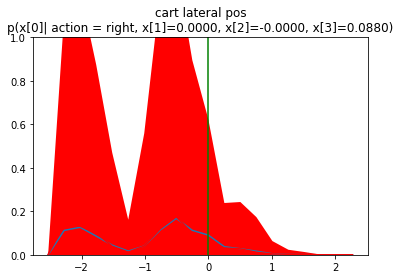

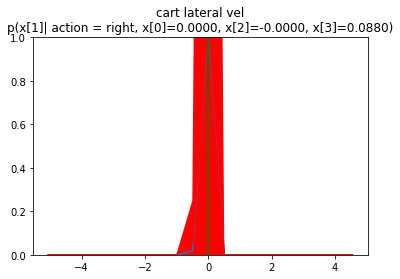

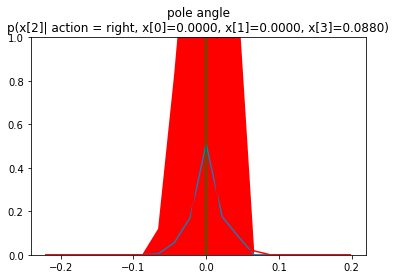

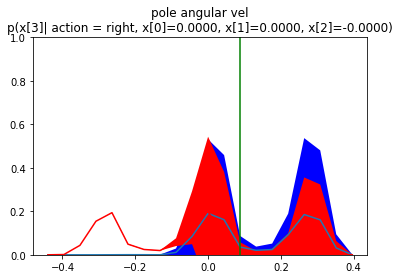

In [10]:

%matplotlib inline
import matplotlib.pyplot as plt
names = ['cart lateral pos', 'cart lateral vel', 'pole angle', 'pole angular vel']
for i in range(4):
    output_str = ""
    for j in range(4):
        if i != j:
            output_str += " x[{}]={:.4f},".format(j, real_dp[j])            
    output_str = output_str[:-1]
    plt.title(names[i] + "\n" + "p(x[{}]| action = right,{})".format(i, output_str))
    diff = (ranges[i][1] - ranges[i][0]) / 2
    if np.sum(avg[i]) == 0:
        plt.plot(ranges[i] - diff, avg[i])
    else:
        plt.plot(ranges[i] - diff, avg[i] / np.sum(avg[i]))
        plt.fill_between(ranges[i] - diff, avg[i]/ np.sum(avg[i])-stderr[i]/ np.sum(avg[i]), avg[i]/ np.sum(avg[i])+stderr[i]/ np.sum(avg[i]), fc='b')
    if np.sum(avg[i+4]) == 0:
        plt.plot(ranges[i] - diff, avg[i+4])
    else:
        plt.plot(ranges[i] - diff, avg[i+4]/np.sum(avg[i+4]), c='r')
        plt.fill_between(ranges[i] - diff, avg[i+4]/np.sum(avg[i+4])-stderr[i+4]/np.sum(avg[i+4]), avg[i+4]/np.sum(avg[i+4])+stderr[i+4]/np.sum(avg[i+4]), fc='r')
    
    plt.axvline(x=[ranges[i][dp[i]]-diff], c='g')
    plt.ylim([0, 1.0])
    plt.show()
